# DRKit

In [1]:
from rdkit import Chem
from ogb.graphproppred import PygGraphPropPredDataset
from torch_geometric.data import DataLoader

In [2]:
# Load the dataset 
dataset = PygGraphPropPredDataset(name='ogbg-molhiv')

split_idx = dataset.get_idx_split()

# Check task type
print('Task type: {}'.format(dataset.task_type))

Task type: binary classification


In [3]:
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print("============= split ==========")

print(f"Number of training nodes: {split_idx['train'].shape[0]}")
print(f"Training graph rate: {int(split_idx['train'].shape[0]) / len(dataset):.2f}")
print(f"Number of validation nodes: {split_idx['valid'].shape[0]}")
print(f"validation node label rate: {int(split_idx['valid'].shape[0]) / len(dataset):.2f}")
print(f"Number of test nodes: {split_idx['test'].shape[0]}")
print(f"test node label rate: {int(split_idx['test'].shape[0]) / len(dataset):.2f}")

Dataset: PygGraphPropPredDataset(41127):
Number of graphs: 41127
Number of features: 9
Number of classes: 2
============= split ==========
Number of training nodes: 32901
Training graph rate: 0.80
Number of validation nodes: 4113
validation node label rate: 0.10
Number of test nodes: 4113
test node label rate: 0.10


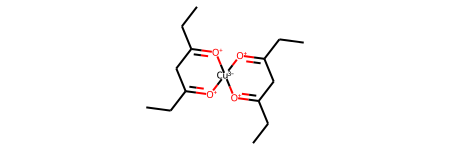

In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules

molhiv_df = pd.read_csv('./dataset/ogbg_molhiv/mapping/mol.csv.gz')
smiles = molhiv_df.smiles[0]
# CCC(O)(C(=O)O)c1cc2n(c(=O)c1CO)Cc1cc3ccccc3nc1-2.[NaH]
amol = Chem.MolFromSmiles(smiles)
amol

In [5]:
import ogb.utils.features as features
import ogb.utils.mol as mol

In [6]:
data = dataset[0]

In [7]:
data

Data(edge_index=[2, 40], edge_attr=[40, 3], x=[19, 9], y=[1, 1], num_nodes=19)

In [8]:
import networkx as nx

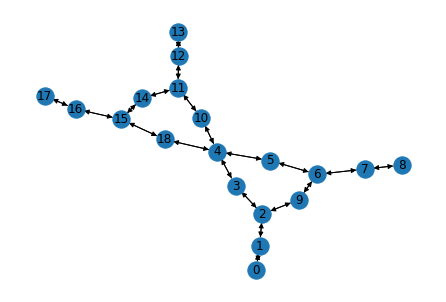

In [9]:
from torch_geometric.utils import to_networkx
G = to_networkx(data)
nx.draw(G, with_labels = True)

In [10]:
features.bond_feature_vector_to_dict(data.edge_attr[4])

{'bond_type': 'DOUBLE', 'bond_stereo': 'STEREONONE', 'is_conjugated': False}

In [11]:
data

Data(edge_index=[2, 40], edge_attr=[40, 3], x=[19, 9], y=[1, 1], num_nodes=19)

In [12]:
data.x[0]

tensor([5, 0, 4, 5, 3, 0, 2, 0, 0])

In [13]:
features.atom_feature_vector_to_dict(data.x[0])

{'atomic_num': 6,
 'chirality': 'CHI_UNSPECIFIED',
 'degree': 4,
 'formal_charge': 0,
 'num_h': 3,
 'num_rad_e': 0,
 'hybridization': 'SP3',
 'is_aromatic': False,
 'is_in_ring': False}